In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from string import punctuation
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
import joblib
#nltk.download("stopwords")

mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

import sys
import re, numpy as np
from pprint import pprint

# Gensim
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

gensim.__version__

'4.3.0'

In [2]:
 # сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

 # сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

 # сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
df=pd.read_excel('data.xlsx')
print(df.shape)
df.head(2)

(101, 2)


,text,label
0,"Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.",0
1,"ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно, смс , в месяц около 200 шт набирается. Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс на обычных сенсорниках и кнопочных -просто издивательствогромкий ,чистый звук (хорошо варьируется как в + так и в -)значение hot кнопок (верхняя панель до основной раскладки цифры/буквы) задается под себямного цветных панелек с пластиковым защитным экраном,переставляются легко(те родной экран телефона никогда не поцарапается)кнопки не стираютсякак не странно достойные фото, нет не спорю не 25 мегапикселей, но отснять рассписание или конспекты, зафотать пейзаж за окном автобуса получается вполне пристойносохранение файлов,отснятых фото, переброшенных песен происходит на карту памяти и это оч удобно, карточки кушает до 32 Гб !удобный ашевский бонус смс чат с аббанентомт.е. вы можете видеть всю ветку беседы с конкретным человеком , а не искать в куче входящих смс с нужной информацией.работает чисто без галюнов,падал,шврялся,купался,используется как тел и плеер,в метро поездов не слышно уши юзаю сенхайзер 300 и 500,mp3 звонок чистый без сипов.Экран не горилла глас , но на солнце сохраняет читаемость, в отличие от большинства сенсорников , битых пикселей и засветов нет.Самсунговские кверти менее удобные ,пользовалась((( буква ""б"" и "" ь"" просто убивают(((Нокиевская кверти интуитивно понятна и более дружелюбна к пользователю.Подстройка телефона под себя те вынос на экран нужных приложений, перемена значений у кнопок существенно облегчает жизнь.",0


# Предобработка

In [4]:
prepare=[]
prepare=df.text.tolist()

In [5]:
prepare

['Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.',
 'ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно,  смс , в месяц около 200 шт набирается. Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс на обычных сенсорниках и кнопочн

In [6]:
sent= ''.join(map(str, prepare))

In [7]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
print('')

# и применяем метод к нашему тексту
sentences = sent_tokenize(sent)
# print(sentences)

# теперь разобъем на слова каждое предложение

# для этого создадим пустой список
tokens = []

# в цикле for пройдемся по каждому предложению
for sentence in sentences:
    # создадим списки из токенов
    t = word_tokenize(sentence)

    # и присоединим списки друг к другу
#     tokens.extend(t)
    tokens.append(t)

print(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



[['Ужасно', 'слабый', 'аккумулятор', ',', 'это', 'основной', 'минус', 'этого', 'аппарата', ',', 'разряжается', 'буквально', 'за', 'пару', 'часов', 'при', 'включенном', 'wifi', 'и', 'на', 'макс', 'подсветке', ',', 'например', 'если', 'играть', 'или', 'смотреть', 'видео', ',', 'следовательно', 'использовать', 'можно', 'только', 'если', 'есть', 'постоянная', 'возможность', 'подзарядиться', '.'], ['Качества', 'звука', 'через', 'динамик', 'далеко', 'не', 'на', 'высоте.Наблюдаются', 'незначительные', 'тормоза', 'в', 'некоторых', 'приложениях', 'и', 'вообще', 'в', 'меню', '.'], ['Очень', 'мало', 'встроенной', 'памяти', ',', 'а', 'приложения', 'устанавливаются', 'именно', 'туда', ',', 'с', 'этим', 'связанны', 'неудобства', '-', 'нужно', 'постоянно', 'переносить', 'их', 'на', 'карту', 'памяти.Несколько', 'неудобно', 'что', 'нету', 'отдельной', 'кнопки', 'для', 'фото', '.'], ['Подумываю', 'купить', 'батарею', 'большей', 'емкость', 'мб', 'что', 'нибудь', 'измениться.ценанадежность-неубиваемостьд

In [8]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tokens, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tokens], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [10]:
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
wnl = WordNetLemmatizer()

stop_words = stopwords.words('russian')
def process_words(texts):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    for sent in texts:
        texts_out.append([wnl.lemmatize(token) for token in sent])
#         print(texts_out.append([wnl.lemmatize(token) for token in sent]))
#     texts_out = mystem.lemmatize(str(texts).lower())
    # remove stopwords after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(tokens)  # processed Text Data!

In [11]:
data_ready

[['ужасно',
  'слабый',
  'аккумулятор',
  'это',
  'основной',
  'минус',
  'аппарата',
  'разряжается',
  'буквально',
  'пару',
  'часов',
  'включенном',
  'wifi',
  'макс',
  'подсветке',
  'например',
  'играть',
  'смотреть',
  'видео',
  'следовательно',
  'использовать',
  'постоянная',
  'возможность',
  'подзарядиться'],
 ['качества',
  'звука',
  'динамик',
  'далеко',
  'высоте',
  'наблюдаются',
  'незначительные',
  'тормоза',
  'некоторых',
  'приложениях',
  'вообще',
  'меню'],
 ['очень',
  'мало',
  'встроенной',
  'памяти',
  'приложения',
  'устанавливаются',
  'именно',
  'туда',
  'этим',
  'связанны',
  'неудобства',
  'нужно',
  'постоянно',
  'переносить',
  'карту',
  'памяти',
  'несколько',
  'неудобно',
  'нету',
  'отдельной',
  'кнопки',
  'фото'],
 ['подумываю',
  'купить',
  'батарею',
  'большей',
  'емкость',
  'мб',
  'измениться',
  'ценанадежность',
  'держит',
  'батарею',
  'дня',
  'стабильно',
  'телефон',
  'плеер',
  'постоянно',
  'долбитьс

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [34]:
# corpus
# data_ready

In [14]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.010*"камера" + 0.007*"qwerty" + 0.007*"телефона" + 0.007*"память" + '
  '0.006*"брать" + 0.006*"клавиатура" + 0.005*"руки" + 0.005*"синий" + '
  '0.004*"также" + 0.004*"nokia"'),
 (1,
  '0.039*"телефон" + 0.024*"очень" + 0.012*"это" + 0.006*"памяти" + '
  '0.006*"довольна" + 0.005*"пользователь" + 0.005*"приложения" + '
  '0.005*"хочется" + 0.005*"удобно" + 0.005*"интернете"')]


In [31]:
lda_model

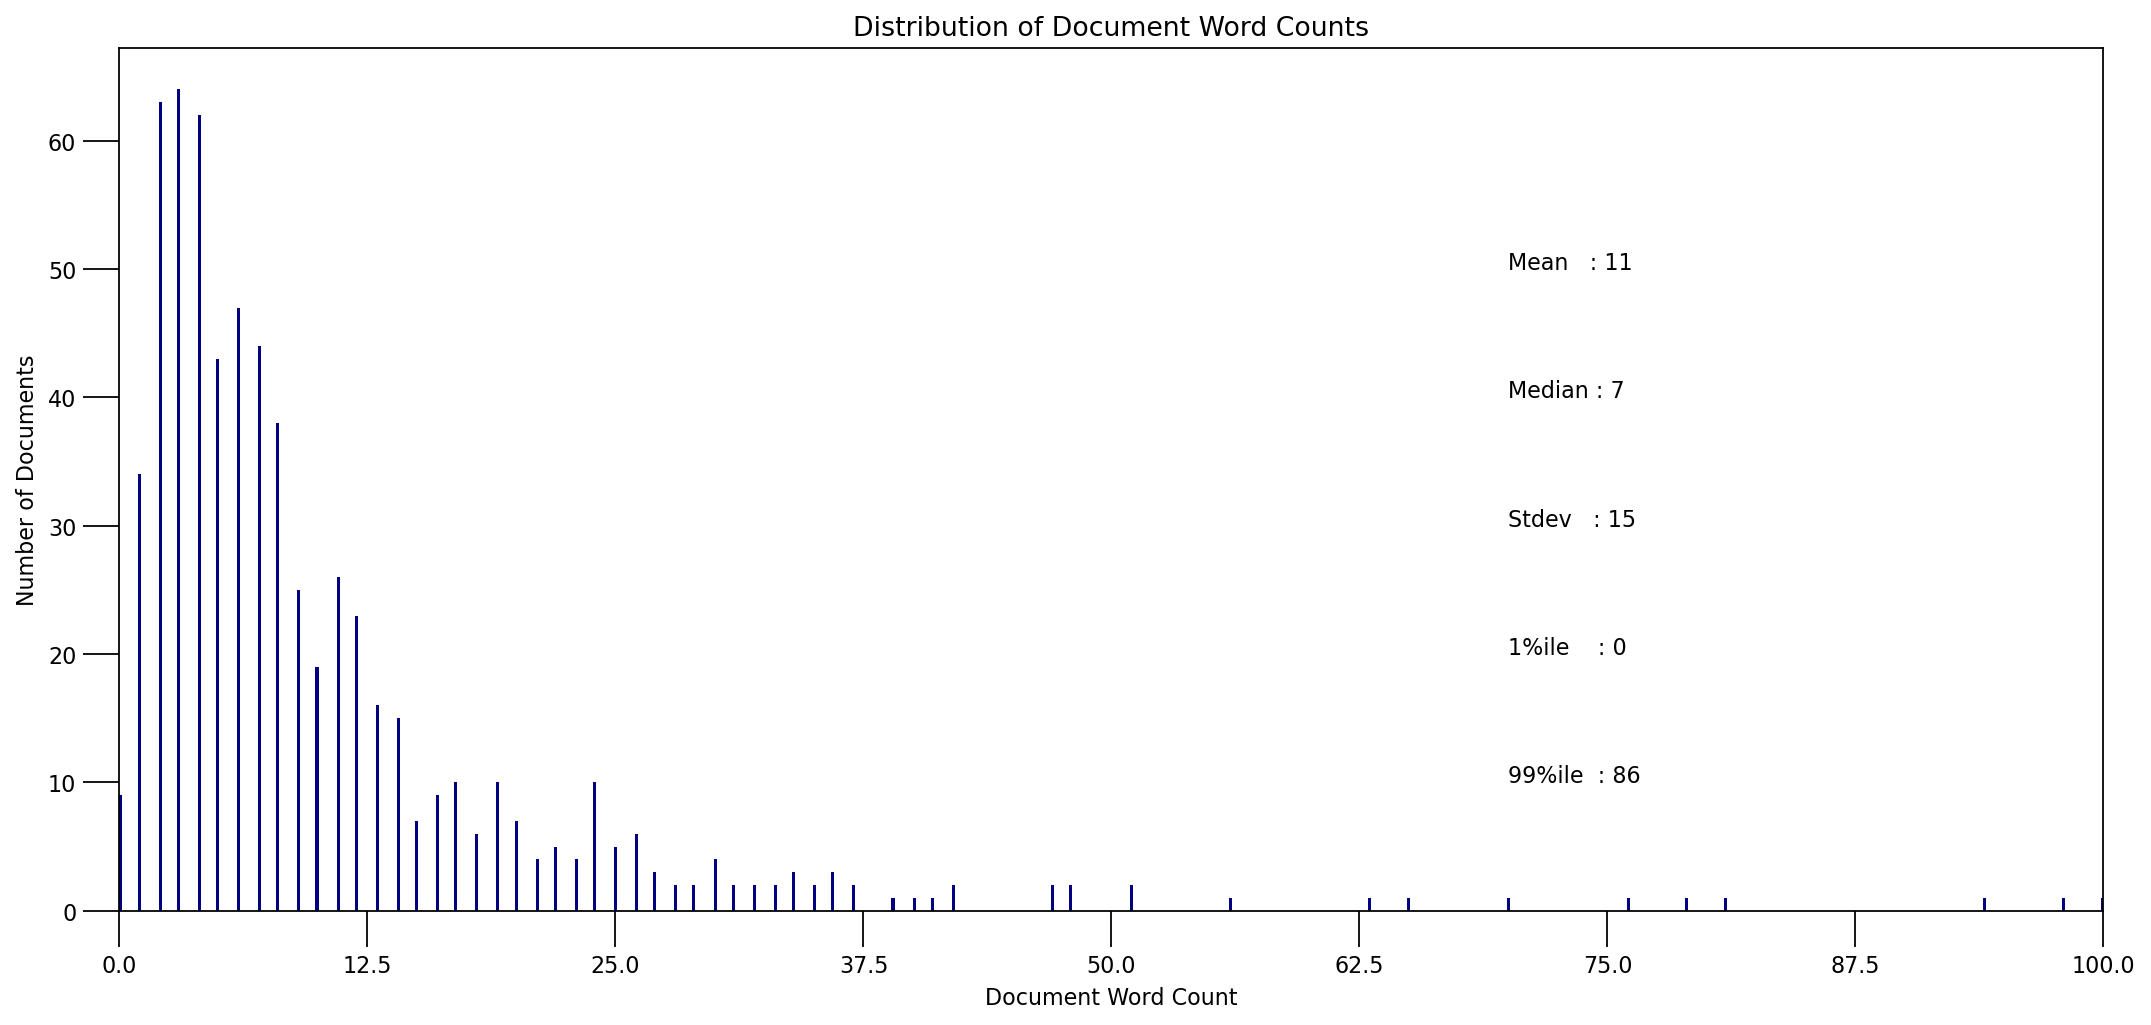

In [15]:
doc_lens = [len(d) for d in data_ready]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(70, 50, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(70,  40, "Median : " + str(round(np.median(doc_lens))))
plt.text(70,  30, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(70,  20, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(70,  10, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts')
plt.show()

In [16]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = {}
for i, topic in topics:
    if i  not in out:
        out[i] = {'word': [], 'importance': [], 'word_count': []}
    for word, weight in topic:
        out[i]["word"].append(word)
        out[i]["importance"].append(weight)
        out[i]["word_count"].append(counter[word])
        

C:\Users\User\AppData\Local\Temp\ipykernel_11208\3292935800.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')


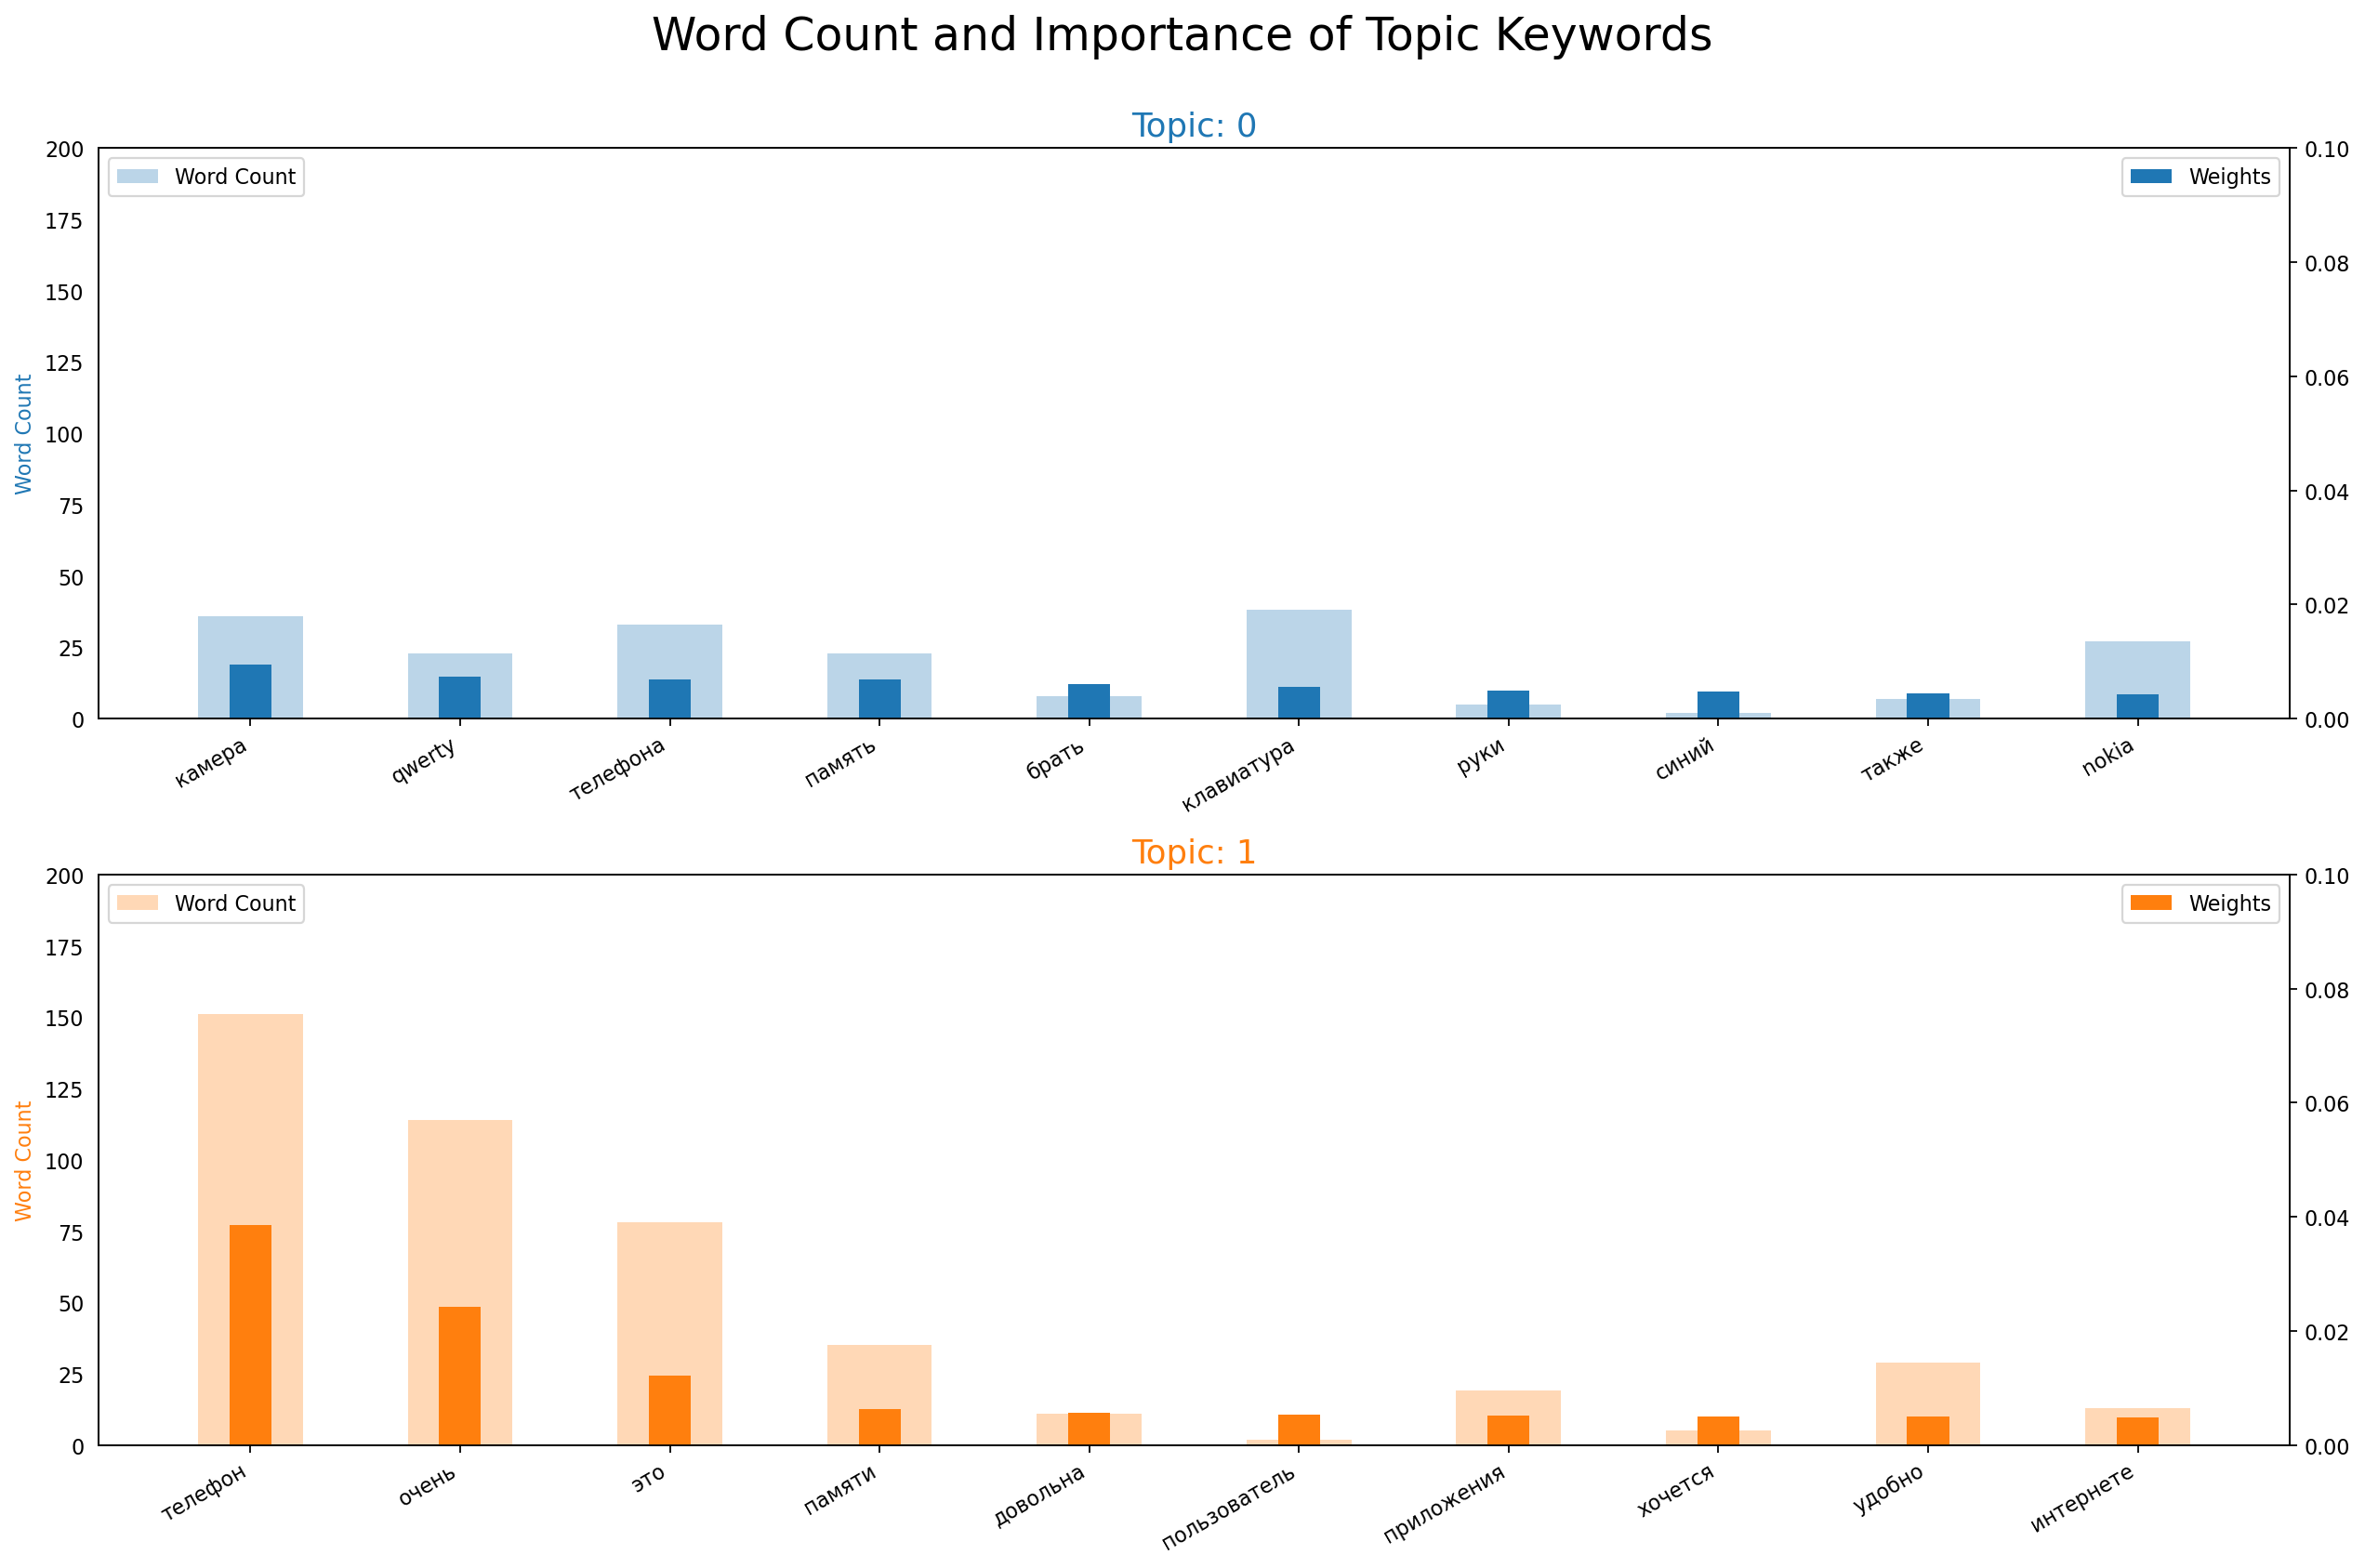

In [17]:
# Plot Word Count and Weights of Topic Keywords
import matplotlib.colors as mcolors

fig, axes = plt.subplots(2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=out[i], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=out[i], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.10); ax.set_ylim(0, 200)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [26]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1 + start) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-1), 
                 fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

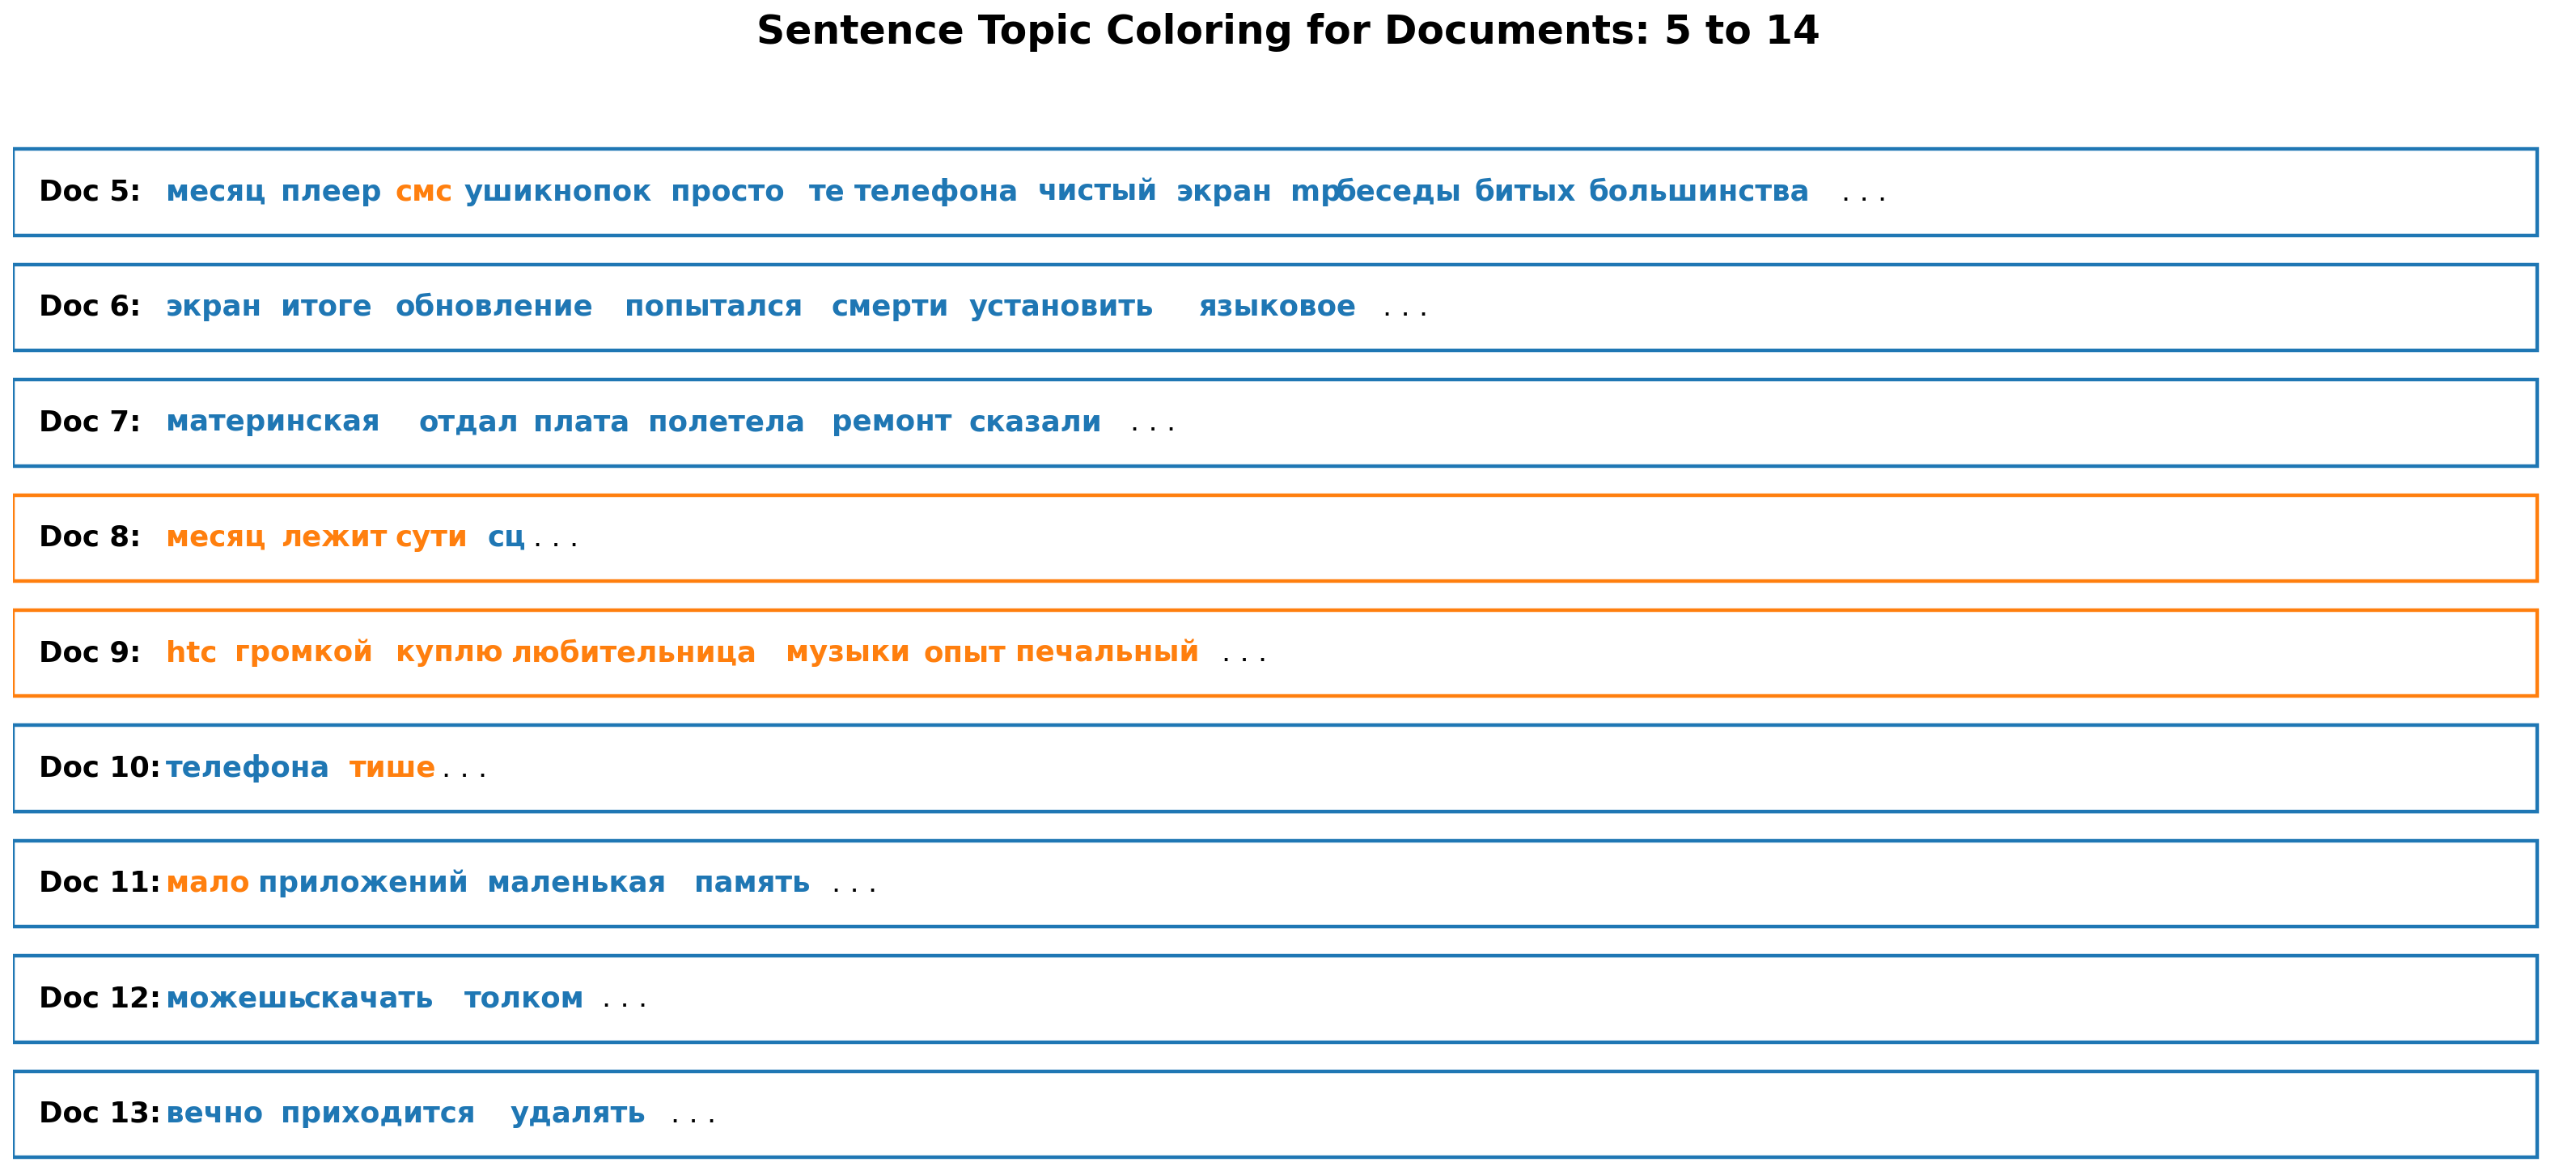

In [27]:
sentences_chart(start=5, end=15)  

In [20]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

C:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [21]:
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.090929  0.0       1        1  50.633403
1     -0.090929  0.0       2        1  49.366597, topic_info=               Term        Freq       Total Category  logprob  loglift
77          телефон  141.000000  141.000000  Default  30.0000  30.0000
47            очень   89.000000   89.000000  Default  29.0000  29.0000
23              это   44.000000   44.000000  Default  28.0000  28.0000
282          камера   36.000000   36.000000  Default  27.0000  27.0000
447          qwerty   27.000000   27.000000  Default  26.0000  26.0000
241          память   26.000000   26.000000  Default  25.0000  25.0000
138        телефона   26.000000   26.000000  Default  24.0000  24.0000
48           памяти   23.000000   23.000000  Default  23.0000  23.0000
925           брать   22.000000   22.000000  Default  22.0000  22.0000
285      клавиатура   21.000000   21.000000  Default  21.0000  21.0000
51       приложения   19.000000   19.000000  Default  20.0000  20.0000
75              смс   18.000000   18.000000  Default  19.0000  19.0000
139          удобно   19.000000   19.000000  Default  18.0000  18.0000
65             игры   17.000000   17.000000  Default  17.0000  17.0000
1438             ос   17.000000   17.000000  Default  16.0000  16.0000
766           nokia   16.000000   16.000000  Default  15.0000  15.0000
3496   пользователь   20.000000   20.000000  Default  14.0000  14.0000
996        нравится   15.000000   15.000000  Default  13.0000  13.0000
1498        хочется   20.000000   20.000000  Default  12.0000  12.0000
531            руки   20.000000   20.000000  Default  11.0000  11.0000
2411          также   17.000000   17.000000  Default  10.0000  10.0000
343            цена   14.000000   14.000000  Default   9.0000   9.0000
973            весь   19.000000   19.000000  Default   8.0000   8.0000
388        интернет   14.000000   14.000000  Default   7.0000   7.0000
1124        которые   15.000000   15.000000  Default   6.0000   6.0000
673       пользуюсь   16.000000   16.000000  Default   5.0000   5.0000
125          просто   14.000000   14.000000  Default   4.0000   4.0000
644         хватает   14.000000   14.000000  Default   3.0000   3.0000
45            нужно   14.000000   14.000000  Default   2.0000   2.0000
485            года   13.000000   13.000000  Default   1.0000   1.0000
241          память   25.637363   26.079128   Topic1  -4.9833   0.6635
138        телефона   25.757539   26.253312   Topic1  -4.9786   0.6615
285      клавиатура   20.928016   21.374196   Topic1  -5.1862   0.6595
282          камера   35.706185   36.529863   Topic1  -4.6520   0.6578
447          qwerty   27.299209   27.945850   Topic1  -4.9205   0.6571
125          просто   13.836789   14.205188   Topic1  -5.6000   0.6543
766           nokia   16.209057   16.641685   Topic1  -5.4418   0.6542
343            цена   14.429030   14.823097   Topic1  -5.5581   0.6536
925           брать   22.335543   22.963764   Topic1  -5.1211   0.6528
284        качество   11.647947   11.980903   Topic1  -5.7722   0.6524
147           экран   12.181296   12.557508   Topic1  -5.7274   0.6501
45            нужно   13.845116   14.275434   Topic1  -5.5994   0.6500
1124        которые   15.128187   15.753160   Topic1  -5.5108   0.6401
30             меню   12.567662   13.088728   Topic1  -5.6962   0.6399
276         батарея   11.081624   11.546061   Topic1  -5.8220   0.6395
24           вообще    9.263719    9.713286   Topic1  -6.0012   0.6332
2411          также   16.728740   17.594146   Topic1  -5.4102   0.6301
1101        советую    8.500952    8.948791   Topic1  -6.0871   0.6292
673       пользуюсь   15.874946   16.724112   Topic1  -5.4626   0.6284
717             год    7.408587    7.833774   Topic1  -6.2247   0.6248
201          сильно    9.111996    9.647346   Topic1  -6.0177   0.6235
170   использования    7.310342    7.753378   Topic1  -6.2380   0.621